In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [2]:
# Classification Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
dfb = pd.read_csv('FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR.csv')

In [4]:
dfb.head()

,Rank,Player,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,...,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG
0,1.0,Davante Adams (GB),14.0,115.0,"1,374",11.9,777,6.8,777,6.8,...,29.7%,116.0,1.0,28.0,49.0,18.0,10.0,5.0,1.0,56.0
1,2.0,Tyreek Hill (KC),15.0,87.0,"1,276",14.7,842,9.7,842,9.7,...,22.1%,94.0,5.0,17.0,49.0,20.0,11.0,5.0,2.0,75.0
2,3.0,Stefon Diggs (BUF),16.0,127.0,"1,535",12.1,"1,071",8.4,"1,071",8.4,...,29.0%,137.0,8.0,16.0,62.0,20.0,5.0,5.0,2.0,55.0
3,4.0,Calvin Ridley (ATL),15.0,90.0,"1,374",15.3,"1,099",12.2,"1,099",12.2,...,23.6%,96.0,6.0,20.0,58.0,23.0,8.0,3.0,2.0,63.0
4,5.0,D.K. Metcalf (SEA),16.0,83.0,"1,303",15.7,940,11.3,940,11.3,...,24.0%,92.0,8.0,16.0,50.0,17.0,12.0,5.0,3.0,62.0


because we are looking at advanced statistics we must get rid of some of the more basic statistics. Specifically receptions, games, targets, and yards.

In [5]:
display(dfb.columns)

Index(['Rank', 'Player', 'G', 'REC', 'YDS', 'Y/R', 'YBC', 'YBC/R', 'AIR',
       'AIR/R', 'YAC', 'YAC/R', 'YACON', 'YACON/R', 'BRKTKL', 'TGT', '% TM',
       'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS', '20+ YDS', '30+ YDS',
       '40+ YDS', '50+ YDS', 'LNG'],
      dtype='object')

In [6]:
dfb = dfb[['Rank', 'Player', 'Y/R', 'YBC', 'YBC/R', 'AIR',
       'AIR/R', 'YAC', 'YAC/R', 'YACON', 'YACON/R', 'BRKTKL', '% TM',
       'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS', '20+ YDS', '30+ YDS',
       '40+ YDS', '50+ YDS', 'LNG']]

In [7]:
dfb['% TM'] = dfb['% TM'].str.rstrip('%').astype('float') / 100.0

In [8]:
corr = dfb.corr()
corr['Rank'].nsmallest(6)

10+ YDS     -0.920567
% TM        -0.917860
CATCHABLE   -0.915263
20+ YDS     -0.879548
YAC         -0.861921
RZ TGT      -0.853427
Name: Rank, dtype: float64

Because the better the rank the smaller the number, we must look at the smallest rather than largest correlation.

In [9]:
df = dfb.dropna()
df.isna().sum()

Rank         0
Player       0
Y/R          0
YBC          0
YBC/R        0
AIR          0
AIR/R        0
YAC          0
YAC/R        0
YACON        0
YACON/R      0
BRKTKL       0
% TM         0
CATCHABLE    0
DROP         0
RZ TGT       0
10+ YDS      0
20+ YDS      0
30+ YDS      0
40+ YDS      0
50+ YDS      0
LNG          0
dtype: int64

I need to create a variable where I can test my accuracy so I will create a new column named top 50 and use different regression models to test the accuracy of the variables I have chosen.

In [16]:
df['Top_50'] = np.where(df['Rank'] < 51, 1, 0)

<ipython-input-16-1d8042931f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Top_50'] = np.where(df['Rank'] < 51, 1, 0)


In [17]:
df.head(2)

,Rank,Player,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,...,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,Top_50
0,1.0,Davante Adams (GB),11.9,777,6.8,777,6.8,597.0,5.2,152.0,...,116.0,1.0,28.0,49.0,18.0,10.0,5.0,1.0,56.0,1
1,2.0,Tyreek Hill (KC),14.7,842,9.7,842,9.7,434.0,5.0,118.0,...,94.0,5.0,17.0,49.0,20.0,11.0,5.0,2.0,75.0,1


In [18]:
df.tail(2)

,Rank,Player,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,...,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,Top_50
197,198.0,Tavon Austin (JAC),4.0,-22,-4.4,-22,-4.4,42.0,8.4,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0
198,199.0,Andre Roberts (LAC),8.5,29,7.3,29,7.3,5.0,1.3,1.0,...,5.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,16.0,0


I created the variable top 50 so I can test my accuracy, as you can see from the data frames head and tail, the column Top 50 is yes when the the player has a rank above 51.

In [19]:
x = df[['10+ YDS', '% TM', 'CATCHABLE', '20+ YDS', 'YAC', 'RZ TGT']]
y = df[['Top_50']]

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 5)

In [21]:
lr = sm.Logit(ytrain, sm.add_constant(xtrain)).fit()
lr_train = round(lr.predict(sm.add_constant(xtrain)))
lr_test = round(lr.predict(sm.add_constant(xtest)))
print()
print('Logistic Regression Accuracies:')
print('-------------------------------')
print()
print("LG Training Accuracy:")
print(metrics.accuracy_score(ytrain, lr_train))
print()
print("LG Testing Accuracy:")
print(metrics.accuracy_score(ytest, lr_test))

         Current function value: 0.000002
         Iterations: 35

Logistic Regression Accuracies:
-------------------------------

LG Training Accuracy:
1.0

LG Testing Accuracy:
0.875


/Users/gauthamsethupathy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/gauthamsethupathy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_train = dt.predict(xtrain)
dt_test = dt.predict(xtest)
print('Decision Tree Accuracies:')
print('-------------------------')
print()
print("DT Training Accuracy:")
print(metrics.accuracy_score(ytrain, dt_train))
print()
print("DT Testing Accuracy:")
print(metrics.accuracy_score(ytest, dt_test))

Decision Tree Accuracies:
-------------------------

DT Training Accuracy:
1.0

DT Testing Accuracy:
0.875


In [23]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 20)
rf.fit(xtrain, ytrain)
rf_train = rf.predict(xtrain)
rf_test = rf.predict(xtest)
print('Random Forest Accuracies:')
print('-------------------------')
print()
print("RF Training Accuracy:")
print(metrics.accuracy_score(ytrain, rf_train))
print()
print("RF Testing Accuracy:")
print(metrics.accuracy_score(ytest, rf_test))

Random Forest Accuracies:
-------------------------

RF Training Accuracy:
1.0

RF Testing Accuracy:
0.9


<ipython-input-23-db19af4443ca>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


Our random forest model seems to have the best accuracy for the testing data, so that will be the model that we use. I will print a confusion matrix for the training and testing for our random forest model to get a better understanding of the model.

<AxesSubplot:title={'center':'Training Data Confusion Matric Plot'}>

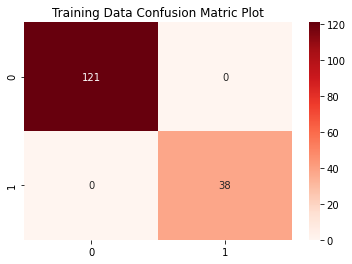

In [24]:
c_train = confusion_matrix(ytrain, rf_train)
c_test = confusion_matrix(ytest, rf_test)

plt.title("Training Data Confusion Matric Plot")
sns.heatmap(c_train, annot = True, fmt = '1', cmap = "Reds")

<AxesSubplot:title={'center':'Testing Data Confusion Matric Plot'}>

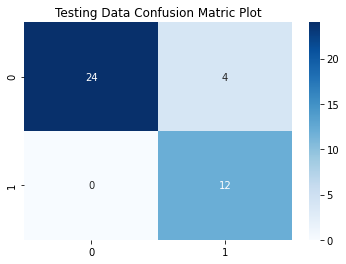

In [25]:
plt.title("Testing Data Confusion Matric Plot")
sns.heatmap(c_test, annot = True, fmt = '1', cmap = "Blues")

As the confusion matrix shows us for the testing data, we only had 4 false positives and 0 false negatives. 90% is a very effective number for using predictions, and focusing on these specific variables and using a random forest model proves to be an effective use of prediction.

I will also test for top 25 for reasons spoken on in the report.

In [26]:
df['Top_25'] = np.where(df['Rank'] < 26, 1, 0)

<ipython-input-26-92ef48a2ae7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Top_25'] = np.where(df['Rank'] < 26, 1, 0)


In [27]:
Y = df[["Top_25"]]

In [28]:
xtrn, xtst, ytrn, ytst = train_test_split(x, Y, test_size = 0.20, random_state = 5)

In [32]:
rf2 = RandomForestClassifier(n_estimators = 20, random_state = 20)
rf2.fit(xtrn, ytrn)
rf2_train = rf2.predict(xtrn)
rf2_test = rf2.predict(xtst)
print('Random Forest Accuracies(Top 25):')
print('-------------------------')
print()
print("RF Training Accuracy:")
print(metrics.accuracy_score(ytrn, rf2_train))
print()
print("RF Testing Accuracy:")
print(metrics.accuracy_score(ytst, rf2_test))

Random Forest Accuracies(Top 25):
-------------------------

RF Training Accuracy:
1.0

RF Testing Accuracy:
0.9


<ipython-input-32-19f3acfecfb7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(xtrn, ytrn)


<AxesSubplot:title={'center':'Training Data Confusion Matric Plot(Top 25)'}>

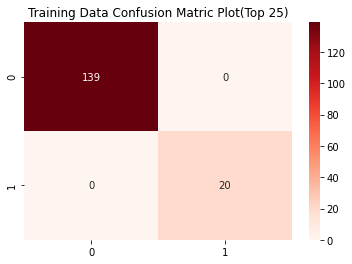

In [30]:
c_train2 = confusion_matrix(ytrn, rf2_train)
c_test2 = confusion_matrix(ytst, rf2_test)

plt.title("Training Data Confusion Matric Plot(Top 25)")
sns.heatmap(c_train2, annot = True, fmt = '1', cmap = "Reds")

<AxesSubplot:title={'center':'Testing Data Confusion Matric Plot(Top 25)'}>

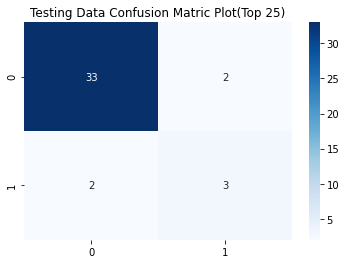

In [31]:
plt.title("Testing Data Confusion Matric Plot(Top 25)")
sns.heatmap(c_test2, annot = True, fmt = '1', cmap = "Blues")